In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
%run PARAMETERS.py
NAME = 'APG'
PATH = NAME + '-10r-%dpts-%dsamples' % (N, SAMPLE_SIZE)
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:0')

In [3]:
from model_operations_beta import Init_models, Save_models

models, optimizer = Init_models(K, 
                                D, 
                                hidden_list=HIDDEN_LIST, 
                                RECON_SIGMA=RECON_SIGMA, 
                                CUDA=CUDA, 
                                device=DEVICE, 
                                lr=LEARNING_RATE, 
                                RESTORE=True, 
                                PATH=PATH, 
                                NAME=NAME)

In [4]:
from testing import Eval
from viz_mc import Viz_MC
from apg_beta import APG_test
from vae import VAE_test

BATCH_SIZE = 4
Viz_INTERVAL = 4
FS = 30
TITLE_FS = 20
OB_MS = 2.0
MU_MARKER = 'X'
MU_MS = 100
OPACITY = 0.7
BOUND = 10
COLORS = ['#EE7733', '#0077BB', '#AA3377', '#009988']
DATA_PTR = 47

evaluator = Eval(K, D, BATCH_SIZE, CUDA, DEVICE)
visualizer = Viz_MC(K, Viz_INTERVAL, FS, TITLE_FS, OB_MS, MU_MARKER, MU_MS, OPACITY, BOUND, COLORS)
if NAME =='APG':
    test_objective = APG_test
elif NAME == 'VAE':
    test_objective = VAE_test
else:
    print('ERROR : Undefined model name !')

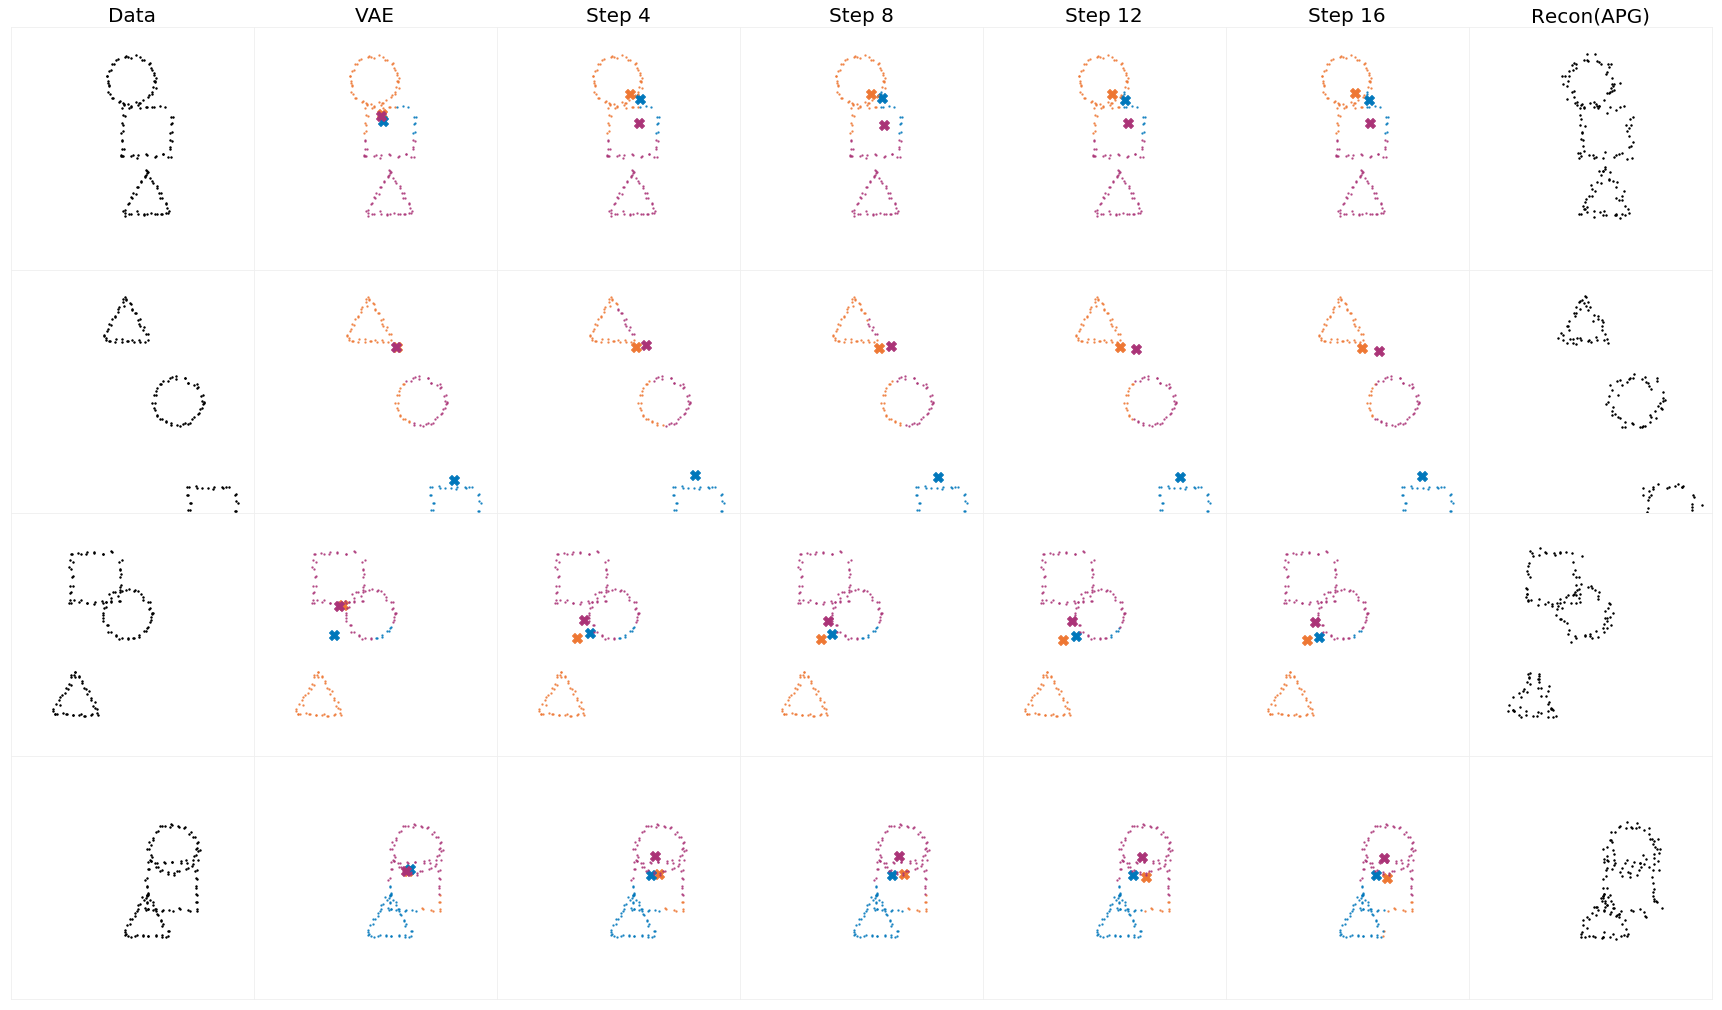

In [5]:
Metrics_sample = evaluator.Test_uniform(models=models, 
                                        objective=test_objective, 
                                        Data=Data, 
                                        data_ptr=DATA_PTR, 
                                        mcmc_steps=16, 
                                        sample_size=1)

visualizer.Plot_chains(Metrics_sample['data'], Metrics_sample['samples'], Metrics_sample['recon'], filename='ncmm-samples-%d' % DATA_PTR)

In [ ]:
# L = 100
# Metrics_converge = evaluator.Test_uniform(APG_test, Data, DATA_PTR, mcmc_steps=40, sample_size=L)
# visualizer.Plot_metrics(Metrics_converge['log_joint'], Metrics_converge['elbos'], Metrics_converge['ess'], sample_size=L, filename='ncmm-metrics-1')

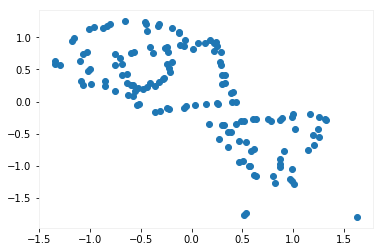

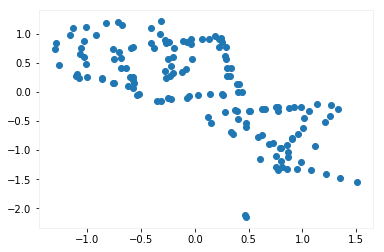

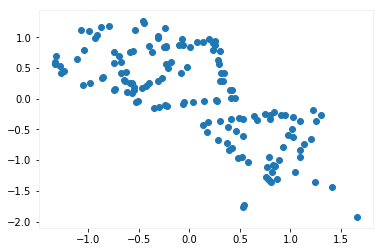

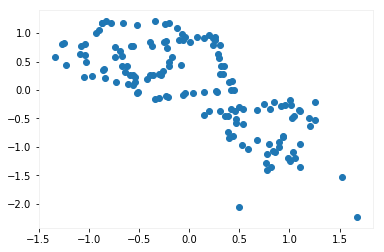

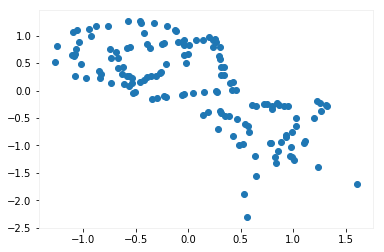

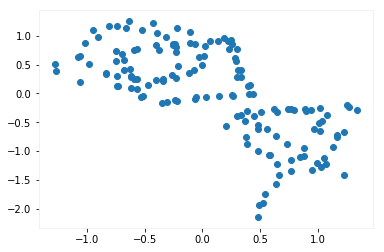

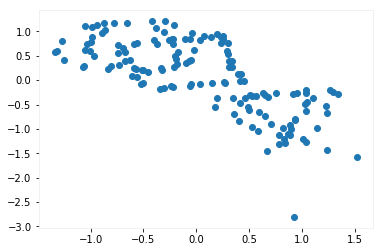

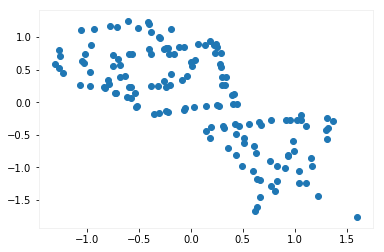

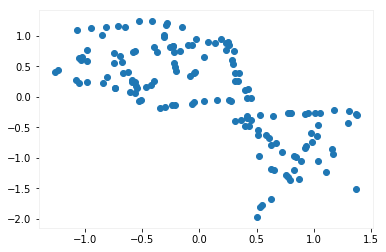

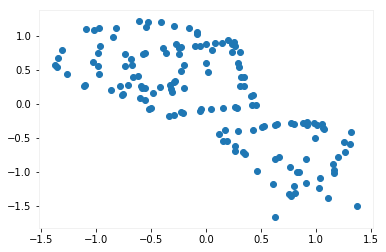

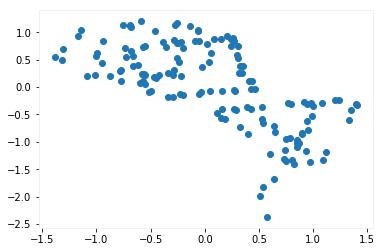

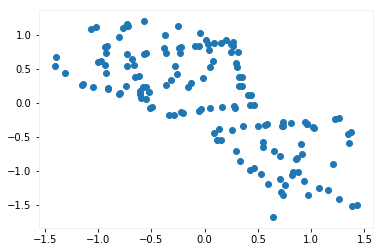

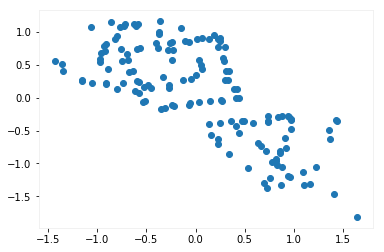

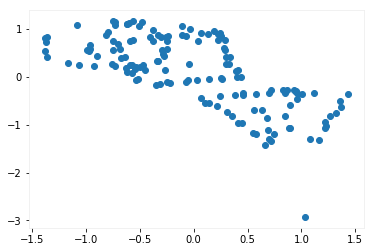

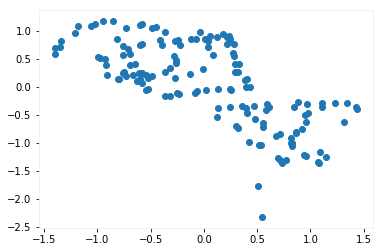

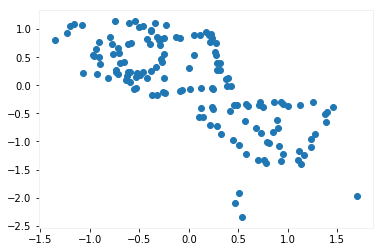

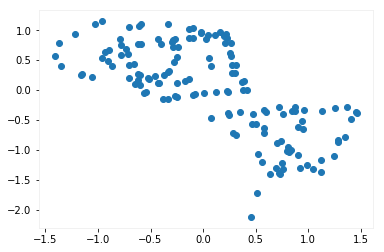

In [7]:
import matplotlib.pyplot as plt
for l in Metrics_sample['samples'][1]:
    (_,_,angle) = l
    plt.scatter(angle[:, 0], angle[:,1])
    plt.show()